Name: Afdal Bouraima
student number : 2304491

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import Sequential,callbacks
from keras.layers import Input,Conv2D,Dense,MaxPooling2D,Dropout,Flatten
from matplotlib import pyplot as plt

In [2]:
def NeuralNetwork(activation,input_shape,learning_rate):
  #Construct our model
  model = Sequential()
  model.add(Input(shape=input_shape))
  model.add(Conv2D(32,(3,3),activation=activation,padding="same"))
  model.add(Conv2D(64,(3,3),activation=activation,padding="same"))
  model.add(MaxPooling2D((3,3)))
  model.add(Dropout(.5))
  model.add(Flatten())
  model.add(Dense(250,activation=activation))
  model.add(Dense(10,activation="softmax"))
  #We compile it
  model.compile(optimizer = keras.optimizers.Adam(learning_rate), # We select the adam optimizer and tune its learning rate
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
  # And we return it
  return model

In [3]:
def plot_results(history, activation_function, dataset):
    plt.figure(figsize=(12, 4))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{activation_function} Activation Function - {dataset}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{activation_function} Activation Function - {dataset}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [6]:
#Load the MNIST dataset
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
#We normalize the input
train_images=train_images/255
test_images=test_images/255

#We reshape it to have 60000X28X28X1
train_images = tf.reshape(train_images,(train_images.shape[0],28,28,1))
#We reshape it to have 10000X28X28X1
test_images = tf.reshape(test_images,(test_images.shape[0],28,28,1))

#Transform the labels to categorial values
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

# validation data
x_validation = train_images[-2000:,:,:,:]
y_validation = train_labels[-2000:]

train_images = train_images[:-2000,:,:,:]
train_labels = train_labels[:-2000]

11490434/11490434 [==============================] - 0s 0us/step


**We are going to select the adam optimizer and tune the learning rate**

In [7]:
learning_rate_list = [0.001, 0.01, 0.1]
best_learning_rate = 0
best_val_acc = 0
for learning_rate in learning_rate_list:
  model = NeuralNetwork("sigmoid",(28,28,1),learning_rate)
  history = model.fit(train_images,train_labels,batch_size=128,epochs=30,validation_data=(x_validation,y_validation))
  val_acc = max(history.history['val_accuracy'])
  if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_learning_rate = learning_rate
print(best_learning_rate)

Epoch 1/30
454/454 [==============================] - 16s 12ms/step - loss: 1.2508 - accuracy: 0.5577 - val_loss: 0.1878 - val_accuracy: 0.9520
Epoch 2/30
454/454 [==============================] - 5s 11ms/step - loss: 0.2586 - accuracy: 0.9224 - val_loss: 0.1097 - val_accuracy: 0.9725
Epoch 3/30
454/454 [==============================] - 5s 12ms/step - loss: 0.1653 - accuracy: 0.9509 - val_loss: 0.0696 - val_accuracy: 0.9835
Epoch 4/30
454/454 [==============================] - 5s 11ms/step - loss: 0.1120 - accuracy: 0.9671 - val_loss: 0.0584 - val_accuracy: 0.9880
Epoch 5/30
454/454 [==============================] - 5s 11ms/step - loss: 0.0838 - accuracy: 0.9748 - val_loss: 0.0532 - val_accuracy: 0.9885
Epoch 6/30
454/454 [==============================] - 5s 11ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 0.0462 - val_accuracy: 0.9920
Epoch 7/30
454/454 [==============================] - 5s 11ms/step - loss: 0.0531 - accuracy: 0.9844 - val_loss: 0.0398 - val_accuracy: 0.992

**From this experiment, the learning rate 0.001 is the more efficient. Now let's take it and make our plots**

In [8]:
model = NeuralNetwork("sigmoid",(28,28,1),0.001)
history = model.fit(train_images,train_labels,batch_size=128,epochs=30,validation_data=(x_validation,y_validation))


Epoch 1/30
454/454 [==============================] - 7s 12ms/step - loss: 1.4613 - accuracy: 0.4679 - val_loss: 0.2056 - val_accuracy: 0.9505
Epoch 2/30
454/454 [==============================] - 8s 17ms/step - loss: 0.2952 - accuracy: 0.9094 - val_loss: 0.1207 - val_accuracy: 0.9695
Epoch 3/30
454/454 [==============================] - 7s 16ms/step - loss: 0.1895 - accuracy: 0.9426 - val_loss: 0.0761 - val_accuracy: 0.9825
Epoch 4/30
454/454 [==============================] - 6s 14ms/step - loss: 0.1280 - accuracy: 0.9621 - val_loss: 0.0620 - val_accuracy: 0.9880
Epoch 5/30
454/454 [==============================] - 6s 13ms/step - loss: 0.0948 - accuracy: 0.9714 - val_loss: 0.0514 - val_accuracy: 0.9880
Epoch 6/30
454/454 [==============================] - 7s 16ms/step - loss: 0.0748 - accuracy: 0.9776 - val_loss: 0.0480 - val_accuracy: 0.9910
Epoch 7/30
454/454 [==============================] - 6s 12ms/step - loss: 0.0641 - accuracy: 0.9811 - val_loss: 0.0427 - val_accuracy: 0.9910

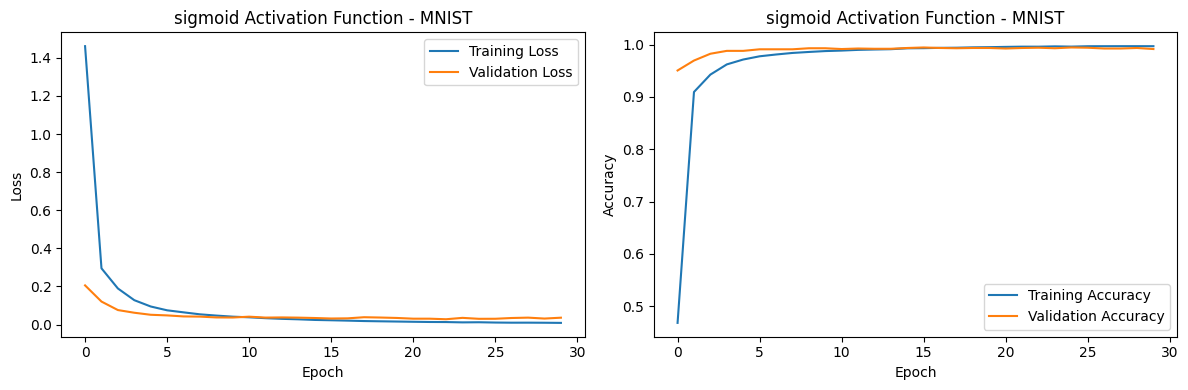

In [9]:
plot_results(history,"sigmoid","MNIST")

**From my previous experimentation in exercise1, I have selected Sigmoid as the optimal activation node for MNIST dataset due to its performance. And now by taking Adam optimizer and tuning the learning rate, We obtain the highest accuracy by setting the learning rate to 0.001. It is why I selected this value as parameter for my optimizer.**